In [1]:
import os

import tensorflow as tf

import cProfile

# 1) https://www.tensorflow.org/guide/eager

In [2]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [4]:
# Build the model
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

In [5]:
for images,labels in dataset.take(1):
      print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.01383554 -0.04311896  0.00468579  0.02663172 -0.05253503 -0.01703398
   0.0023439  -0.01505692  0.01761053 -0.02049292]]


In [6]:
dataset.take(1)

<TakeDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [7]:
dataset.take(2)

<TakeDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [8]:
for images,labels in dataset.take(2):
      print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.01131738 -0.0349133   0.00436365  0.02141805 -0.04255836 -0.01222132
   0.00522296 -0.01136101  0.0135953  -0.01777178]]
Logits:  [[ 0.00868497 -0.02633667  0.00378692  0.01505686 -0.03012795 -0.00988068
   0.00062857 -0.00875417  0.01069043 -0.0108057 ]]


In [9]:
for images,labels in dataset.take(3):
      print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.01672072 -0.0496078   0.005604    0.02883614 -0.06121216 -0.01935804
   0.00452593 -0.01870145  0.01982135 -0.02325529]]
Logits:  [[ 0.01234549 -0.03548413  0.00298782  0.02152538 -0.04342612 -0.01452789
   0.00280155 -0.01149965  0.01273404 -0.01511956]]
Logits:  [[ 0.01762662 -0.04036514  0.00041118  0.0266051  -0.05514634 -0.01811177
   0.00573437 -0.01516054  0.01509123 -0.01738932]]


In [27]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [28]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)

        # Add asserts to check the shape of the output.
        tf.debugging.assert_equal(logits.shape, (32, 10))

        loss_value = loss_object(labels, logits)
    
    print('loss_value=',loss_value.numpy())

    loss_history.append(loss_value.numpy())  #.mean() #It is already reduced mean by the loss function
    print('loss_history=',loss_history)
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [29]:
def train(epochs):
    for epoch in range(epochs):
        for (batch, (images, labels)) in enumerate(dataset):
            print('batch', batch)
            print('images shape:', images.shape)
            print('labels shape:', labels.shape)
            train_step(images, labels)
        print ('Epoch {} finished'.format(epoch))

In [30]:
train(epochs = 1)

batch 0
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2914927
loss_history= [2.2914927]
batch 1
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2886176
loss_history= [2.2914927, 2.2886176]
batch 2
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2649162
loss_history= [2.2914927, 2.2886176, 2.2649162]
batch 3
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2948909
loss_history= [2.2914927, 2.2886176, 2.2649162, 2.2948909]
batch 4
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2760973
loss_history= [2.2914927, 2.2886176, 2.2649162, 2.2948909, 2.2760973]
batch 5
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2876854
loss_history= [2.2914927, 2.2886176, 2.2649162, 2.2948909, 2.2760973, 2.2876854]
batch 6
images shape: (32, 28, 28, 1)
labels shape: (32,)
loss_value= 2.2797115
loss_history= [2.2914927, 2.2886176, 2.2649162, 2.2948909, 2.2760973, 2.2876854, 2.2797115]
batch 7
images shape: (32, 

KeyboardInterrupt: 

In [24]:
mnist_model.trainable_variables

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 16) dtype=float32, numpy=
 array([[[[-0.12154196,  0.19620886,  0.18602411,  0.18985493,
            0.1657337 ,  0.04148731, -0.13020304,  0.0029327 ,
           -0.15226436,  0.13155273, -0.01044366, -0.10070579,
           -0.09122629,  0.08013799,  0.04476796, -0.1932644 ]],
 
         [[-0.03316274, -0.09844884, -0.16664006,  0.06727233,
           -0.09404676,  0.01180836,  0.02455634,  0.06113025,
            0.11195737,  0.09963435,  0.08064803,  0.06413048,
            0.06695274, -0.15132248, -0.16455029, -0.10465654]],
 
         [[ 0.14412752,  0.07732762,  0.06569345,  0.19844998,
           -0.12001146, -0.16437156, -0.09148487,  0.01086803,
           -0.16690923,  0.196875  , -0.08159024, -0.15596008,
            0.11447214,  0.01506476, -0.07891957,  0.08591003]]],
 
 
        [[[-0.04826206,  0.03478168, -0.15719701,  0.07471006,
           -0.18633577,  0.09310967, -0.02222473, -0.18526702,
            0.03303456, -0.09

Text(0, 0.5, 'Loss [entropy]')

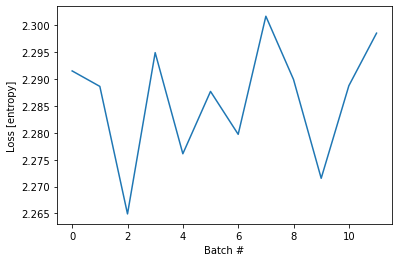

In [31]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [ ]:
class Linear(tf.keras.Model):
  def __init__(self):
    super(Linear, self).__init__()
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')
  def call(self, inputs):
    return inputs * self.W + self.B

# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# The loss function to be optimized
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])

In [ ]:
if not os.path.exists(checkpoint_dir):
  os.makedirs(checkpoint_dir)

# IMPORTANT!
# https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715
    
https://medium.com/analytics-vidhya/transforming-the-world-into-paintings-with-cyclegan-6748c0b85632

## @tf.function

In [2]:
import tensorflow as tf

In [3]:
@tf.function
def add(a, b):
    return a + b

add(tf.ones([2, 2]), tf.ones([2, 2]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [6]:
v = tf.Variable(1.0)
with tf.GradientTape() as tape:
    result = add(2*v, 1.0)

In [7]:
tape.gradient(result, v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

# Saving and loading model problems (keeping optimizer state)
# How to resume training (finetuning) keeping the optimizer state!!!!

### 1) DO NOT load_weights() after defining model again!
    Redefining the model followed by load_weight() definitely won't work, because save_weight() and load_weight() does not save/load the optimizer! 
    
https://stackoverflow.com/questions/47995324/does-model-compile-initialize-all-the-weights-and-biases-in-keras-tensorflow#:~:text=Compile%20defines%20the%20loss%20function,loss%20function%20and%20the%20optimizer
    
### 2) DO NOT compile model after load_model()
    Did you call model.compile(optimizer='adam') after load_model()? If so, don't do that. Re-compiling the model with the option optimizer='adam' will reset the inner state of the optimizer (in fact, a new Adam optimizer instance is created)
    Just call load_model() followed by model.fit()

https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training?noredirect=1&lq=1

#### THE PREVIOUS LINK MIGHT HAVE FULLY WORKING EXAMPLE!!

    
### 3) Be carefull with the learning rate on plateau! 
      reduce_lr = ReduceLROnPlateau(monitor='loss', factor=lr_reduction_factor,
                              patience=patience, min_lr=min_lr, verbose=1)
https://stackoverflow.com/questions/42666046/loading-a-trained-keras-model-and-continue-training?rq=1 

#### THE PREVIOUS LINK MIGHT HAVE FULLY WORKING EXAMPLE IN SUBLINKS!!


### 4)Please save the model in *.tf format. From my experience, if you have any custom_loss defined, *.h5 format will not save optimizer status and hence will not serve your purpose if you want to retrain the model from where we left.

https://stackoverflow.com/questions/42666046/loading-a-trained-keras-model-and-continue-training?rq=1

### 5) Save and load optimizer state
https://stackoverflow.com/questions/49503748/save-and-load-model-optimizer-state


<br>
<br>
<br>
<br>
<br>
<br>

### 6) see https://www.tensorflow.org/guide/eager for saving optimizer state with CheckPoints!!

### 7) 

#### Does model.save() and load_model() work alone without anything else to load the state of the optimizer???

https://stackoverflow.com/questions/56414605/keras-how-to-resume-training-with-adam-optimizer


<br>
<br>
<br>
<br>
<br>
<br>

https://stackoverflow.com/questions/48161147/error-restoring-model-in-tensorflow-after-changing-the-optimizer-paramter/48212514#48212514

**Is this true???** <br>
https://github.com/keras-team/keras/issues/2378

It is happening because model.save(filename.h5) does not save the state of the optimizer. So the optimizers like Adam, RMSProp does not work but SGD works as mentioned in one of the previous comments (I verified this) since it is stateless optimizer (learning rate is fixed).

This is just sad that such a popular library has such basic/glaring/trivial bugs/problems :(

**MAYBE NOT** chollet says: "Yes. The optimizer state isn't reset until you recompile the model with a new optimizer." in the https://github.com/keras-team/keras/issues/3704#issuecomment-245052225

### - We may have problems resuming and keeping optimizer state in tensorflow work in Fujitsu!!!

# General Keras Questions
- https://keras.io/getting_started/faq/#how-can-i-save-a-keras-model

# Tricks in training NNs:
- 

# Resources to see:
- https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training?noredirect=1&lq=1
- https://stackoverflow.com/questions/42666046/loading-a-trained-keras-model-and-continue-training?rq=1
- 